In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import networkx as nx

plt.style.use('ggplot')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
'/Users/eoinkeaney/Desktop/Cap_Stone_Data/filtered_final_comment_ver_1_30-4-2021.csv'

In [63]:
df = pd.read_csv('/Users/eoinkeaney/Desktop/Cap_Stone_Data/filtered_final_comment_ver_1_30-4-2021.csv')

In [148]:
df.shape

(23077, 44)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23077 entries, 0 to 23076
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        23077 non-null  object 
 1   name                              23077 non-null  object 
 2   score                             23077 non-null  float64
 3   parent_id                         23077 non-null  object 
 4   depth                             23077 non-null  float64
 5   body                              23077 non-null  object 
 6   author                            23077 non-null  object 
 7   created_utc                       23077 non-null  float64
 8   subreddit_name_prefixed           23077 non-null  object 
 9   date                              23077 non-null  object 
 10  body_lenght_full                  23077 non-null  int64  
 11  processed_quote                   23077 non-null  object 
 12  toke

In [10]:
Target_col_full = ['score','depth','body_lenght_full','objectivity_avg','polarity_avg','vader_compound','vader_neg','vader_neu','vader_pos',
'google_sentiment_score','google_sentiment_magnitude','whatson_sentiment_score','child_depth','child_body_lenght_full',
'child_objectivity_avg','child_polarity_avg','child_vader_compound','child_vader_neg','child_vader_neu','child_vader_pos','child_google_sentiment_score','child_google_sentiment_magnitude','child_whatson_sentiment_score']

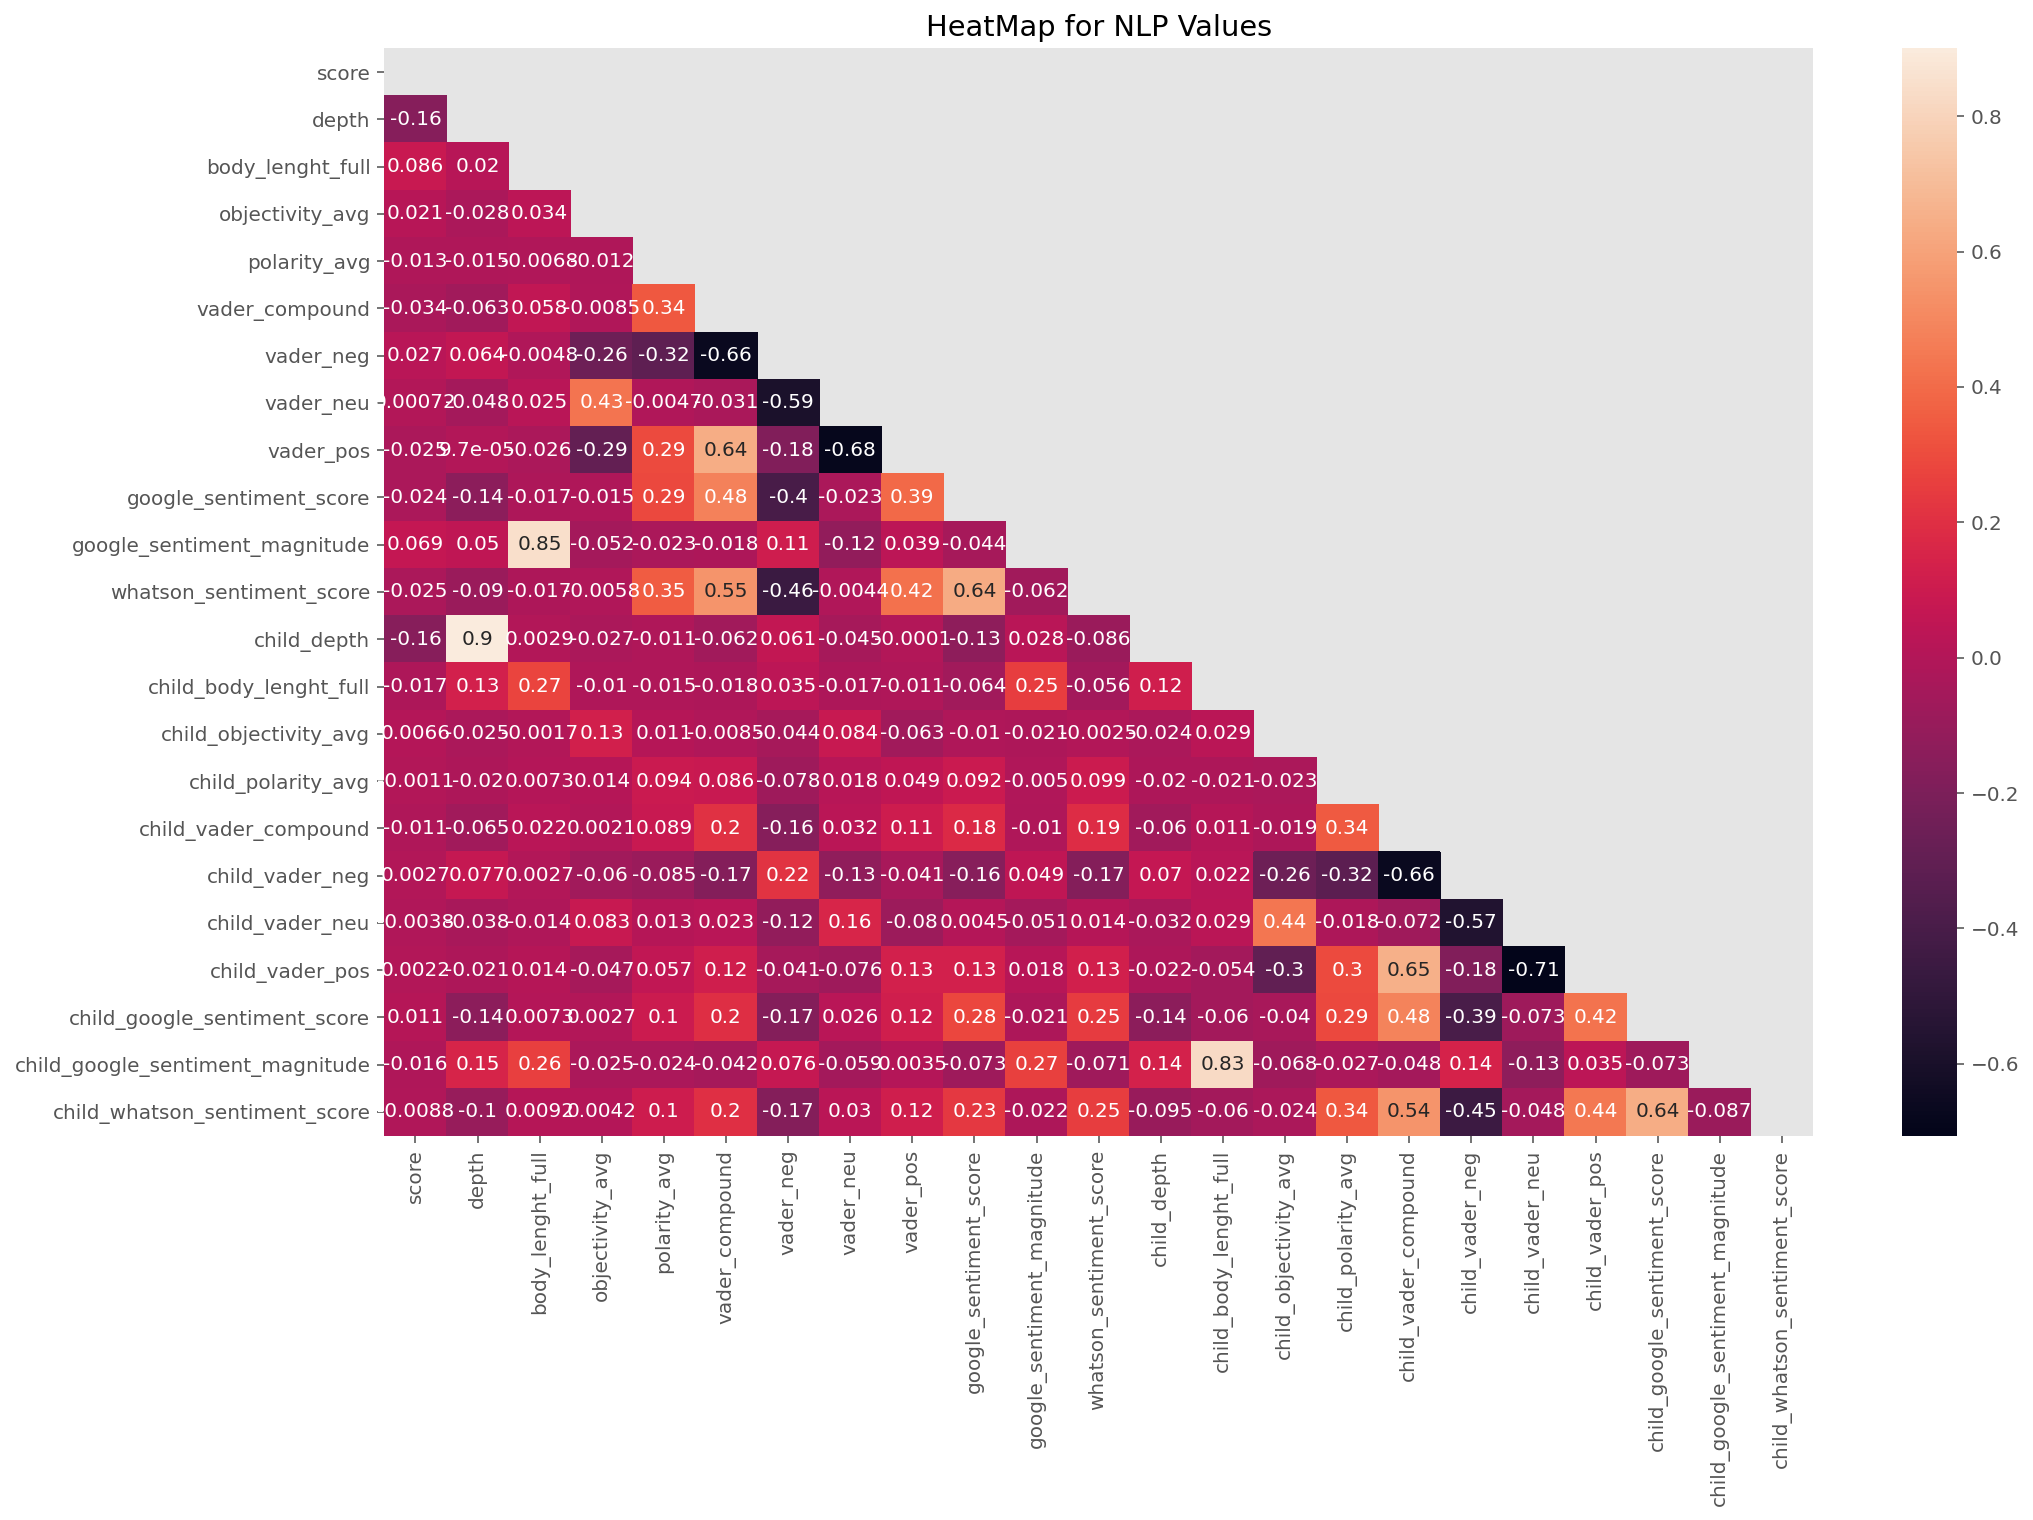

In [8]:
# Set the default matplotlib figure size:
fig, ax = plt.subplots(figsize=(16, 10))

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(df[Target_col_full].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
sns.heatmap(df[Target_col_full].corr(), mask=mask, annot=True, ax=ax)
# ax.set_yticks(np.arange(0, X.shape[1])+0.1)
# ax.set_ylim([X.shape[1], 0])
plt.title('HeatMap for NLP Values')
plt.show()

In [7]:
from sklearn.model_selection import cross_val_score, train_test_split

from sklearn.linear_model import LinearRegression

In [114]:
y = df['child_score']

In [25]:
y.mean()

5.27737574208086

In [24]:
df.score.mean()

13.114139619534601

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df[Target_col_full],y,test_size=0.2)

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
model.score(X_train, y_train)

0.17552354422154903

In [13]:
model.score(X_test, y_test)

0.10566251989584108

In [4]:
from sklearn.model_selection import GridSearchCV

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

In [13]:
scaler = StandardScaler()
model = LinearRegression()

In [14]:
pipe = Pipeline(steps=[('scaler', scaler),
                       ('model', model)])

In [15]:
pipe.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('model', LinearRegression())],
 'verbose': False,
 'scaler': StandardScaler(),
 'model': LinearRegression(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'model__copy_X': True,
 'model__fit_intercept': True,
 'model__n_jobs': None,
 'model__normalize': False,
 'model__positive': False}

In [22]:
params = {}
gs = GridSearchCV(pipe, params, cv=5, n_jobs=-2, verbose=1)
gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.score(X_train, y_train))
print(gs.score(X_test, y_test))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
0.1570347442231295
0.17552354422154903
0.10566251989584075


In [2]:
from sklearn.model_selection import cross_val_score

In [3]:
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [28]:
models = [BaggingRegressor(),
          RandomForestRegressor(),
          DecisionTreeRegressor(),
          KNeighborsRegressor()]

table = []

for model in models:
    pipe_l = make_pipeline(scaler, model)
    pipe_l.fit(X_train, y_train)
    scores = cross_val_score(pipe_l,X_train, y_train,cv=5)

    table.append([model,pipe_l.score(X_train, y_train),pipe_l.score(X_test, y_test),scores.mean()])



Lets find the best basic model to work from


NameError: name 'HTML' is not defined

In [1]:
from IPython.display import HTML, display
import tabulate

In [30]:
print('Lets find the best basic model to work from')
display(HTML(tabulate.tabulate(table, tablefmt='html', headers=["Model","Train", "Test", "Cross Val"])))

Lets find the best basic model to work from


Model,Train,Test,Cross Val
BaggingRegressor(),0.822369,-0.0135849,0.0429813
RandomForestRegressor(),0.87906,0.0724308,0.132031
DecisionTreeRegressor(),1,-1.00356,-0.68393
KNeighborsRegressor(),0.357931,-0.0476125,0.0206873


In [76]:
model = RandomForestRegressor()
pipe = Pipeline(steps=[('scaler', scaler),
                       ('model', model)])

In [32]:
pipe.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('model', RandomForestRegressor())],
 'verbose': False,
 'scaler': StandardScaler(),
 'model': RandomForestRegressor(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'model__bootstrap': True,
 'model__ccp_alpha': 0.0,
 'model__criterion': 'mse',
 'model__max_depth': None,
 'model__max_features': 'auto',
 'model__max_leaf_nodes': None,
 'model__max_samples': None,
 'model__min_impurity_decrease': 0.0,
 'model__min_impurity_split': None,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2,
 'model__min_weight_fraction_leaf': 0.0,
 'model__n_estimators': 100,
 'model__n_jobs': None,
 'model__oob_score': False,
 'model__random_state': None,
 'model__verbose': 0,
 'model__warm_start': False}

In [77]:
params = {'model__max_depth': [3, 4, 5, 6],
#           'model__max_features':[1,2,3,4],
#           'model__max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 10, 12, 16, 32, 48, 64],
          'model__min_samples_leaf': [3,4,5,6,7,10,20],
          'model__min_samples_split':[3,4,5,6]
          }
gs = GridSearchCV(pipe, params, cv=5, n_jobs=-2, verbose=1)
gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.score(X_train, y_train))
print(gs.score(X_test, y_test))

Fitting 5 folds for each of 112 candidates, totalling 560 fits
0.21518719330668318
0.3037296493190723
0.19073398983352252


In [78]:
params = {'model__max_depth': [9],
          'model__max_features':[0.8],
          'model__max_leaf_nodes': [48, 64],
          'model__min_samples_leaf': [51,52,53,54,60,70],
          'model__min_samples_split':[7]
          }
gs = GridSearchCV(pipe, params, cv=5, n_jobs=-2, verbose=1)
gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.score(X_train, y_train))
print(gs.score(X_test, y_test))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
0.2164081329337777
0.26741179182516917
0.20026012861545361


In [123]:
type(y)

pandas.core.series.Series

In [119]:
test_1 = pd.DataFrame(y,columns=['Actual'],ax)

In [121]:
test_1 = gs.predict(df[Target_col_full])

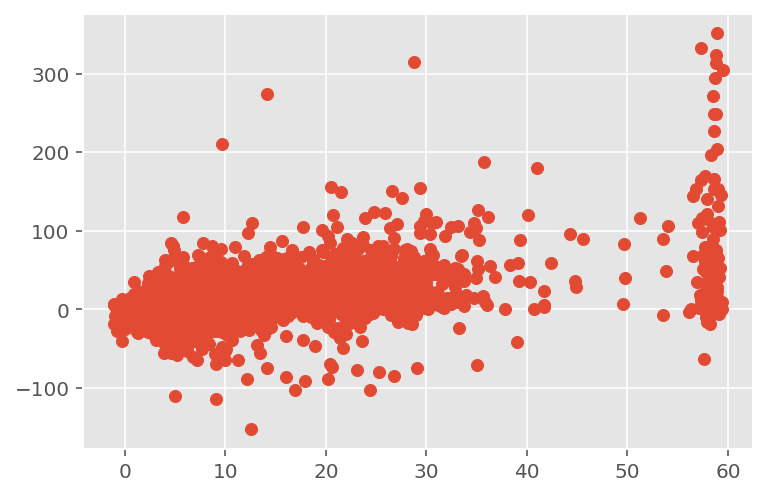

In [125]:
plt.scatter(test_1,y)

In [126]:
import seaborn as sns

TypeError: 'str' object is not callable

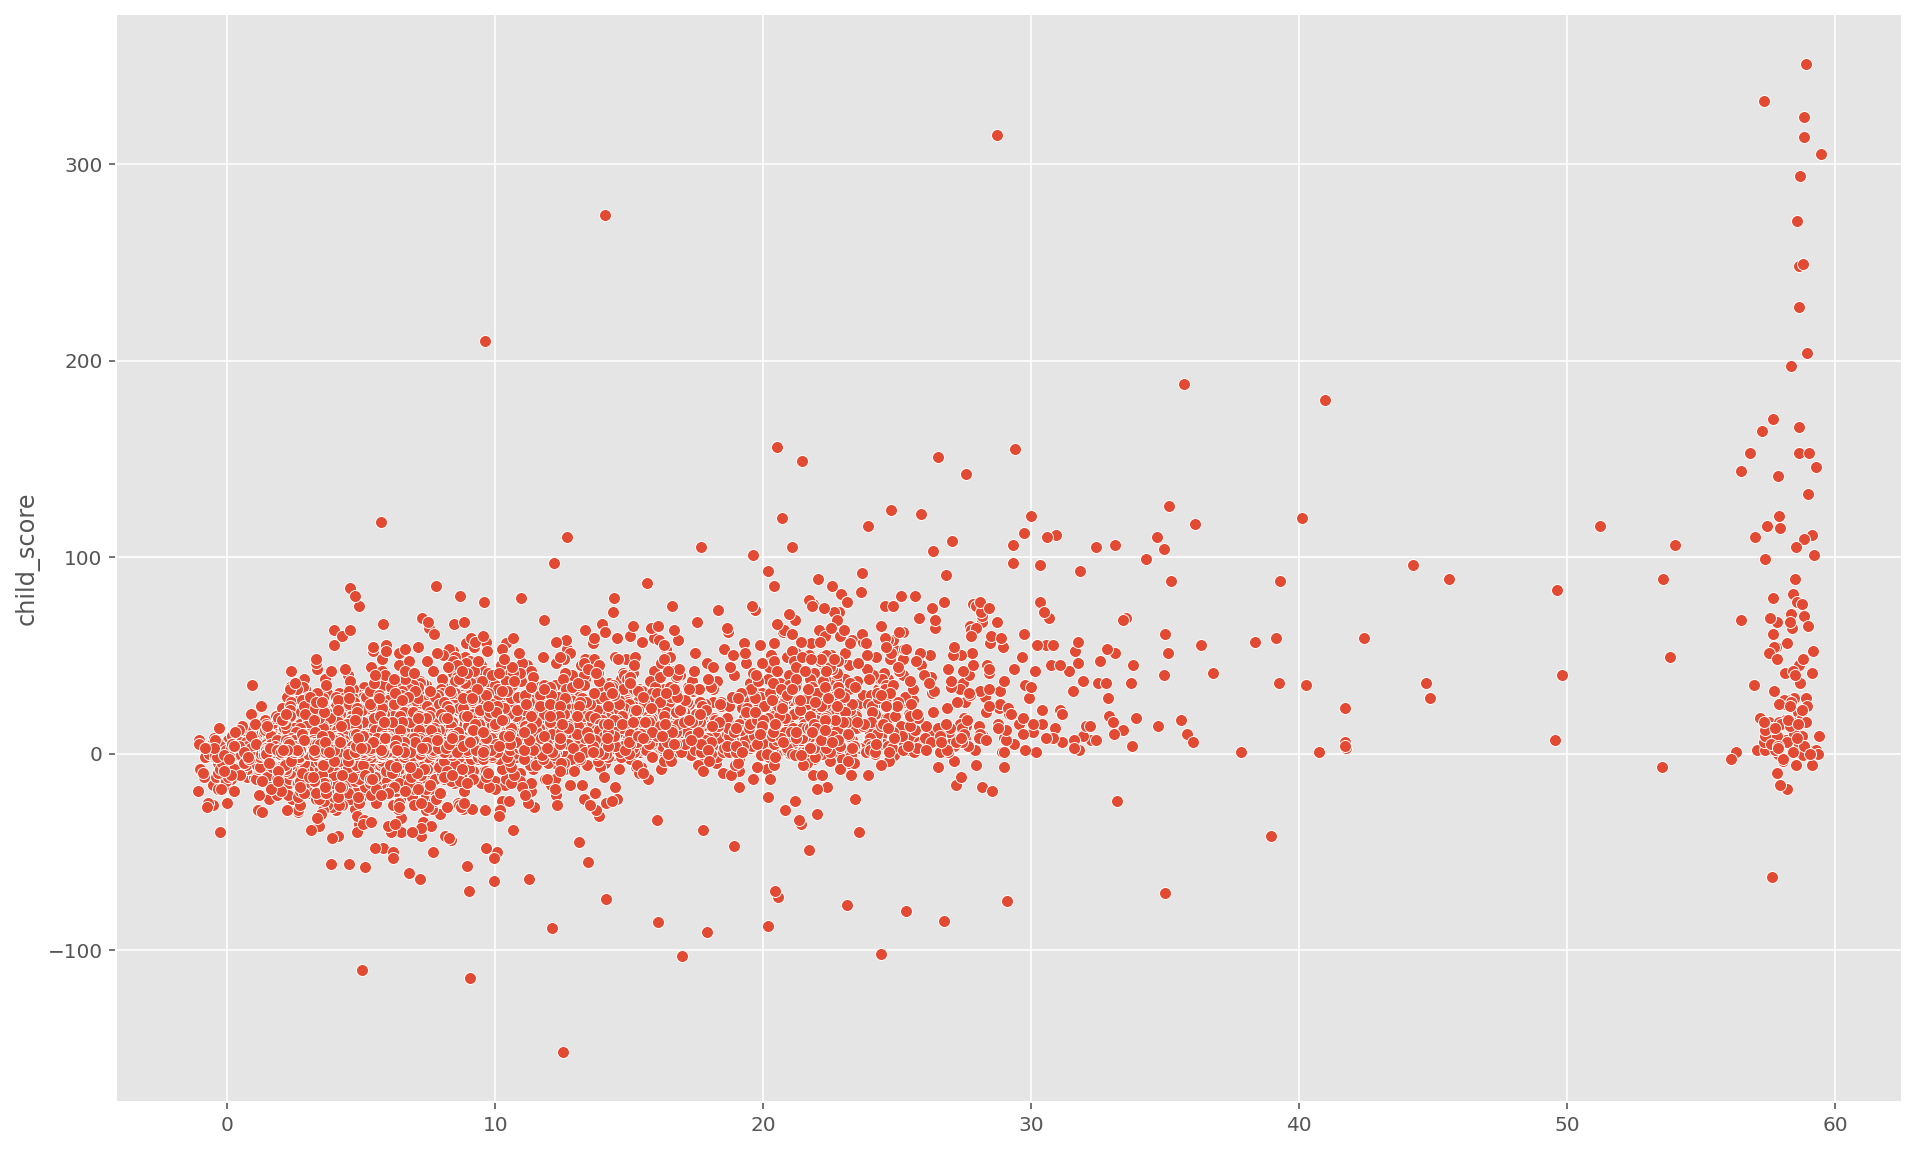

In [140]:
plt.figure(figsize=(16, 10))
sns.scatterplot(x=test_1,y=y)
plt.xlabel(str("Predicted"))
plt.ylabel("Actual")


In [124]:
test_2 = pd.concat(y,test_1)

TypeError: first argument must be an iterable of pandas objects, you passed an object of type "Series"

In [91]:
pred_train = pd.DataFrame(gs.predict(X_train),columns=['Predicted'])
pred_test = pd.DataFrame(gs.predict(X_test),columns=['Predicted'])

In [100]:
pred_train.insert(loc=1,column='Actual', value=y_train)
pred_test['Actual'] = y_test
pred_train['Flag'] = 'Train'
pred_test['Flag'] = 'Test'

ValueError: cannot insert Actual, already exists

In [99]:
X_test

,score,depth,body_lenght_full,objectivity_avg,polarity_avg,vader_compound,vader_neg,vader_neu,vader_pos,google_sentiment_score,...,child_body_lenght_full,child_objectivity_avg,child_polarity_avg,child_vader_compound,child_vader_neg,child_vader_neu,child_vader_pos,child_google_sentiment_score,child_google_sentiment_magnitude,child_whatson_sentiment_score
4948,5.0,0.0,125,0.924487,-0.000708,0.4767,0.043,0.891,0.066,-0.4,...,89.0,0.810753,-0.009768,0.2363,0.040,0.889,0.071,-0.1,2.6,0.353449
22898,32.0,0.0,14,0.933333,-0.041667,0.0000,0.000,1.000,0.000,0.1,...,89.0,0.874210,0.007031,0.2391,0.081,0.839,0.080,-0.5,2.0,-0.708760
21278,6.0,5.0,14,0.979167,-0.020833,0.0000,0.000,1.000,0.000,-0.4,...,20.0,0.856090,0.141987,0.6597,0.000,0.769,0.231,-0.2,0.2,-0.778389
9187,6.0,0.0,59,0.947511,-0.013055,-0.5803,0.112,0.849,0.039,-0.3,...,31.0,0.797155,-0.149273,-0.4864,0.135,0.822,0.042,-0.7,2.1,-0.993864
12727,5.0,2.0,26,0.817167,0.099432,0.7430,0.000,0.759,0.241,0.0,...,30.0,0.751923,0.125481,0.6652,0.000,0.807,0.193,0.2,1.4,0.951320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17308,4.0,1.0,68,0.866552,0.032885,0.9246,0.063,0.702,0.235,0.3,...,35.0,0.885096,-0.013301,0.8953,0.051,0.661,0.288,0.0,1.8,-0.814813
4691,3.0,0.0,122,0.773785,-0.063954,-0.6535,0.147,0.743,0.110,-0.4,...,21.0,0.701389,-0.050595,0.7177,0.124,0.556,0.320,0.2,1.3,0.728744
18660,8.0,1.0,73,0.920040,-0.052877,0.6682,0.038,0.855,0.106,-0.5,...,37.0,0.859375,-0.039062,0.4696,0.000,0.922,0.078,-0.5,1.7,-0.818497
4834,3.0,0.0,114,0.875405,-0.004846,0.7920,0.029,0.869,0.102,0.2,...,31.0,0.888571,0.050714,0.7470,0.000,0.820,0.180,0.3,1.1,0.970151


In [97]:
pred_train

,Predicted,Actual,Flag
0,1.921727,12.0,Train
1,14.090973,65.0,Train
2,14.687194,50.0,Train
3,3.963259,41.0,Train
4,2.126025,NaN,Train
...,...,...,...
18456,14.871530,NaN,Train
18457,0.828547,NaN,Train
18458,2.355404,NaN,Train
18459,2.961808,0.0,Train


In [95]:
len(pred_train)

18461

In [96]:
len(y_train)

18461

In [83]:
type(y_train)

pandas.core.series.Series

In [ ]:
pd_results = pd.DataFrame

In [87]:
gs.best_estimator_[1]


RandomForestRegressor(max_depth=9, max_features=0.8, max_leaf_nodes=48,
                      min_samples_leaf=53, min_samples_split=7)

In [88]:
gs.best_estimator_[1].feature_importances_

array([0.8373946 , 0.0192042 , 0.01458006, 0.00482827, 0.00607919,
       0.00940063, 0.00815015, 0.00594119, 0.00496102, 0.00597989,
       0.00886176, 0.00763913, 0.00468459, 0.00853374, 0.00599877,
       0.00764321, 0.00548727, 0.00550661, 0.00430562, 0.00461981,
       0.00647756, 0.00481882, 0.00890391])

In [92]:
import datetime
datetime.datetime.now().strftime('RandomForestRegressor-max-features-%Y%m%d-%H:%M.csv')

'RandomForestRegressor-max-features-20210501-15:27.csv'

In [109]:
import pickle

pickle.dump(gs, open('RandomForestRegressor-max-features-gs.pickel', 'wb'))

In [105]:
!touch RandomForestRegressor-max-features.pickel

In [16]:
model_dt = DecisionTreeRegressor()
pipe_dt = Pipeline(steps=[('scaler', scaler),
                       ('model', model_dt)])

In [58]:
pipe_dt.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('model', DecisionTreeRegressor())],
 'verbose': False,
 'scaler': StandardScaler(),
 'model': DecisionTreeRegressor(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'model__ccp_alpha': 0.0,
 'model__criterion': 'mse',
 'model__max_depth': None,
 'model__max_features': None,
 'model__max_leaf_nodes': None,
 'model__min_impurity_decrease': 0.0,
 'model__min_impurity_split': None,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2,
 'model__min_weight_fraction_leaf': 0.0,
 'model__random_state': None,
 'model__splitter': 'best'}

In [79]:
params = {'model__max_depth': [4],
#           'model__max_features':[10,11,12],
          'model__max_leaf_nodes': [7, 8, 10],
          'model__min_samples_leaf': [57],
          'model__min_samples_split':[3,4,5]
          }
gs_dt = GridSearchCV(pipe_dt, params, cv=5, n_jobs=-2, verbose=1)
gs_dt.fit(X_train, y_train)
print(gs_dt.best_score_)
print(gs_dt.score(gs_dt.best_estimator_[1], y_train))
print(gs_dt.score(X_test, y_test))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.17112641482600943
0.23077307920742707
0.10432489919509247


In [80]:
gs_dt.best_estimator_[1]

DecisionTreeRegressor(max_depth=4, max_leaf_nodes=8, min_samples_leaf=57,
                      min_samples_split=3)

In [81]:
test = gs_dt.best_estimator_[1]

In [82]:
test.feature_importances_

array([0.94785947, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.05214053])

In [84]:
X_test.shape

(4616, 23)

In [121]:
coef_df = pd.DataFrame(gs.cv_results_)

In [133]:
coef_df.sort_values(by='mean_test_score',ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__max_depth,param_model__max_features,param_model__max_leaf_nodes,param_model__min_samples_leaf,param_model__min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
23321,7.690289,0.046944,0.025740,0.001237,9,0.8,48,53,7,"{'model__max_depth': 9, 'model__max_features':...",0.224803,0.132699,0.273761,0.223725,0.209061,0.212810,0.045628,1
17148,6.798791,0.026741,0.026910,0.002155,7,0.8,64,60,2,"{'model__max_depth': 7, 'model__max_features':...",0.220399,0.131502,0.276128,0.223106,0.210405,0.212308,0.046451,2
17077,6.828697,0.049460,0.026520,0.002204,7,0.8,48,53,3,"{'model__max_depth': 7, 'model__max_features':...",0.214879,0.135889,0.275011,0.223774,0.210912,0.212093,0.044523,3
23388,7.763854,0.032729,0.025344,0.002084,9,0.8,64,60,2,"{'model__max_depth': 9, 'model__max_features':...",0.219101,0.133815,0.275064,0.221090,0.209881,0.211790,0.045227,4
20248,7.596334,0.021959,0.026727,0.001635,8,0.8,64,51,6,"{'model__max_depth': 8, 'model__max_features':...",0.220247,0.131745,0.274628,0.221400,0.210674,0.211739,0.045871,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11731,0.582113,0.018941,0.009707,0.002610,5,0.2,2,52,3,"{'model__max_depth': 5, 'model__max_features':...",0.033053,0.036010,0.048148,0.048927,0.031286,0.039485,0.007548,24956
21099,0.615026,0.010629,0.009834,0.001917,8,0.2,2,53,5,"{'model__max_depth': 8, 'model__max_features':...",0.048369,0.033164,0.050711,0.042013,0.022556,0.039363,0.010371,24957
21065,0.620307,0.016053,0.012902,0.002843,8,0.2,2,10,7,"{'model__max_depth': 8, 'model__max_features':...",0.039884,0.044028,0.042685,0.040510,0.026701,0.038762,0.006211,24958
17974,0.618382,0.009130,0.016759,0.002609,7,0.2,2,52,6,"{'model__max_depth': 7, 'model__max_features':...",0.043150,0.029355,0.038173,0.046618,0.036089,0.038677,0.005949,24959


In [17]:
coef_df = pd.read_csv('RandomForestRegressor-max-features-features.csv')

In [36]:
for x in coef_df.sort_values(by='rank_test_score').params.iloc[0:10]:
    print(type(eval(x)))
    dict_a = eval(x)
    print(dict_a)

<class 'dict'>
{'model__max_depth': 9, 'model__max_features': 0.8, 'model__max_leaf_nodes': 48, 'model__min_samples_leaf': 53, 'model__min_samples_split': 7}
<class 'dict'>
{'model__max_depth': 7, 'model__max_features': 0.8, 'model__max_leaf_nodes': 64, 'model__min_samples_leaf': 60, 'model__min_samples_split': 2}
<class 'dict'>
{'model__max_depth': 7, 'model__max_features': 0.8, 'model__max_leaf_nodes': 48, 'model__min_samples_leaf': 53, 'model__min_samples_split': 3}
<class 'dict'>
{'model__max_depth': 9, 'model__max_features': 0.8, 'model__max_leaf_nodes': 64, 'model__min_samples_leaf': 60, 'model__min_samples_split': 2}
<class 'dict'>
{'model__max_depth': 8, 'model__max_features': 0.8, 'model__max_leaf_nodes': 64, 'model__min_samples_leaf': 51, 'model__min_samples_split': 6}
<class 'dict'>
{'model__max_depth': 9, 'model__max_features': 0.8, 'model__max_leaf_nodes': 48, 'model__min_samples_leaf': 54, 'model__min_samples_split': 5}
<class 'dict'>
{'model__max_depth': 8, 'model__max_f

In [39]:
params = []
for x in coef_df.sort_values(by='rank_test_score').params.iloc[0:100]:
    dict_a = eval(x)
    dict_b = {}
    for key in dict_a:
        array = []
        array.append(dict_a[key])
        dict_b[key] = array
    params.append(dict_b)

In [40]:
params

[{'model__max_depth': [9],
  'model__max_features': [0.8],
  'model__max_leaf_nodes': [48],
  'model__min_samples_leaf': [53],
  'model__min_samples_split': [7]},
 {'model__max_depth': [7],
  'model__max_features': [0.8],
  'model__max_leaf_nodes': [64],
  'model__min_samples_leaf': [60],
  'model__min_samples_split': [2]},
 {'model__max_depth': [7],
  'model__max_features': [0.8],
  'model__max_leaf_nodes': [48],
  'model__min_samples_leaf': [53],
  'model__min_samples_split': [3]},
 {'model__max_depth': [9],
  'model__max_features': [0.8],
  'model__max_leaf_nodes': [64],
  'model__min_samples_leaf': [60],
  'model__min_samples_split': [2]},
 {'model__max_depth': [8],
  'model__max_features': [0.8],
  'model__max_leaf_nodes': [64],
  'model__min_samples_leaf': [51],
  'model__min_samples_split': [6]},
 {'model__max_depth': [9],
  'model__max_features': [0.8],
  'model__max_leaf_nodes': [48],
  'model__min_samples_leaf': [54],
  'model__min_samples_split': [5]},
 {'model__max_depth': 

In [42]:
best_scores = []
feature_import = []

In [44]:
for run in params:
    print(run)
    gs_dt_l = GridSearchCV(pipe_dt, run, cv=5, n_jobs=-2, verbose=1)
    gs_dt_l.fit(X_train, y_train)
    best_scores.append([gs_dt_l.best_score_,
                        gs_dt_l.score(X_train, y_train),
                        gs_dt_l.score(X_test, y_test)])
    feature_import.append(gs_dt_l.best_estimator_[1].feature_importances_)

{'model__max_depth': [9], 'model__max_features': [0.8], 'model__max_leaf_nodes': [48], 'model__min_samples_leaf': [53], 'model__min_samples_split': [7]}
Fitting 5 folds for each of 1 candidates, totalling 5 fits
{'model__max_depth': [7], 'model__max_features': [0.8], 'model__max_leaf_nodes': [64], 'model__min_samples_leaf': [60], 'model__min_samples_split': [2]}
Fitting 5 folds for each of 1 candidates, totalling 5 fits
{'model__max_depth': [7], 'model__max_features': [0.8], 'model__max_leaf_nodes': [48], 'model__min_samples_leaf': [53], 'model__min_samples_split': [3]}
Fitting 5 folds for each of 1 candidates, totalling 5 fits
{'model__max_depth': [9], 'model__max_features': [0.8], 'model__max_leaf_nodes': [64], 'model__min_samples_leaf': [60], 'model__min_samples_split': [2]}
Fitting 5 folds for each of 1 candidates, totalling 5 fits
{'model__max_depth': [8], 'model__max_features': [0.8], 'model__max_leaf_nodes': [64], 'model__min_samples_leaf': [51], 'model__min_samples_split': [6]}

{'model__max_depth': [8], 'model__max_features': [0.8], 'model__max_leaf_nodes': [48], 'model__min_samples_leaf': [52], 'model__min_samples_split': [6]}
Fitting 5 folds for each of 1 candidates, totalling 5 fits
{'model__max_depth': [6], 'model__max_features': [0.8], 'model__max_leaf_nodes': [64], 'model__min_samples_leaf': [51], 'model__min_samples_split': [3]}
Fitting 5 folds for each of 1 candidates, totalling 5 fits
{'model__max_depth': [8], 'model__max_features': [1.0], 'model__max_leaf_nodes': [32], 'model__min_samples_leaf': [60], 'model__min_samples_split': [4]}
Fitting 5 folds for each of 1 candidates, totalling 5 fits
{'model__max_depth': [8], 'model__max_features': [0.8], 'model__max_leaf_nodes': [64], 'model__min_samples_leaf': [54], 'model__min_samples_split': [2]}
Fitting 5 folds for each of 1 candidates, totalling 5 fits
{'model__max_depth': [8], 'model__max_features': [0.8], 'model__max_leaf_nodes': [48], 'model__min_samples_leaf': [40], 'model__min_samples_split': [6]}

{'model__max_depth': [9], 'model__max_features': [0.8], 'model__max_leaf_nodes': [64], 'model__min_samples_leaf': [53], 'model__min_samples_split': [5]}
Fitting 5 folds for each of 1 candidates, totalling 5 fits
{'model__max_depth': [8], 'model__max_features': [0.8], 'model__max_leaf_nodes': [32], 'model__min_samples_leaf': [53], 'model__min_samples_split': [7]}
Fitting 5 folds for each of 1 candidates, totalling 5 fits
{'model__max_depth': [9], 'model__max_features': [0.8], 'model__max_leaf_nodes': [32], 'model__min_samples_leaf': [51], 'model__min_samples_split': [3]}
Fitting 5 folds for each of 1 candidates, totalling 5 fits
{'model__max_depth': [8], 'model__max_features': [0.8], 'model__max_leaf_nodes': [64], 'model__min_samples_leaf': [53], 'model__min_samples_split': [6]}
Fitting 5 folds for each of 1 candidates, totalling 5 fits
{'model__max_depth': [7], 'model__max_features': [1.0], 'model__max_leaf_nodes': [48], 'model__min_samples_leaf': [40], 'model__min_samples_split': [3]}

In [47]:
pd.DataFrame(best_scores,columns=['Best_score','Train','Test']).to_csv('best_scores.csv')

In [ ]:
pd.DataFrame(best_scores,columns=['Best_score','Train','Test']).to_csv('best_scores.csv')

In [51]:
pd.DataFrame(feature_import,columns=X_train.columns).to_csv('feature_import.csv')

In [141]:
pd_feat= pd.DataFrame(feature_import,columns=X_train.columns)

<AxesSubplot:ylabel='Frequency'>

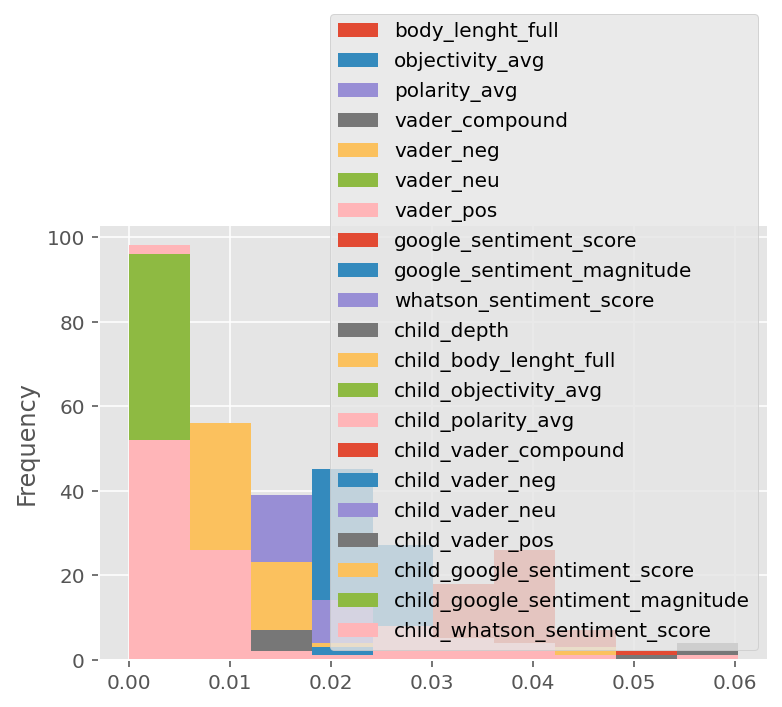

In [145]:
pd_feat.iloc[:,2:].plot.hist()

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

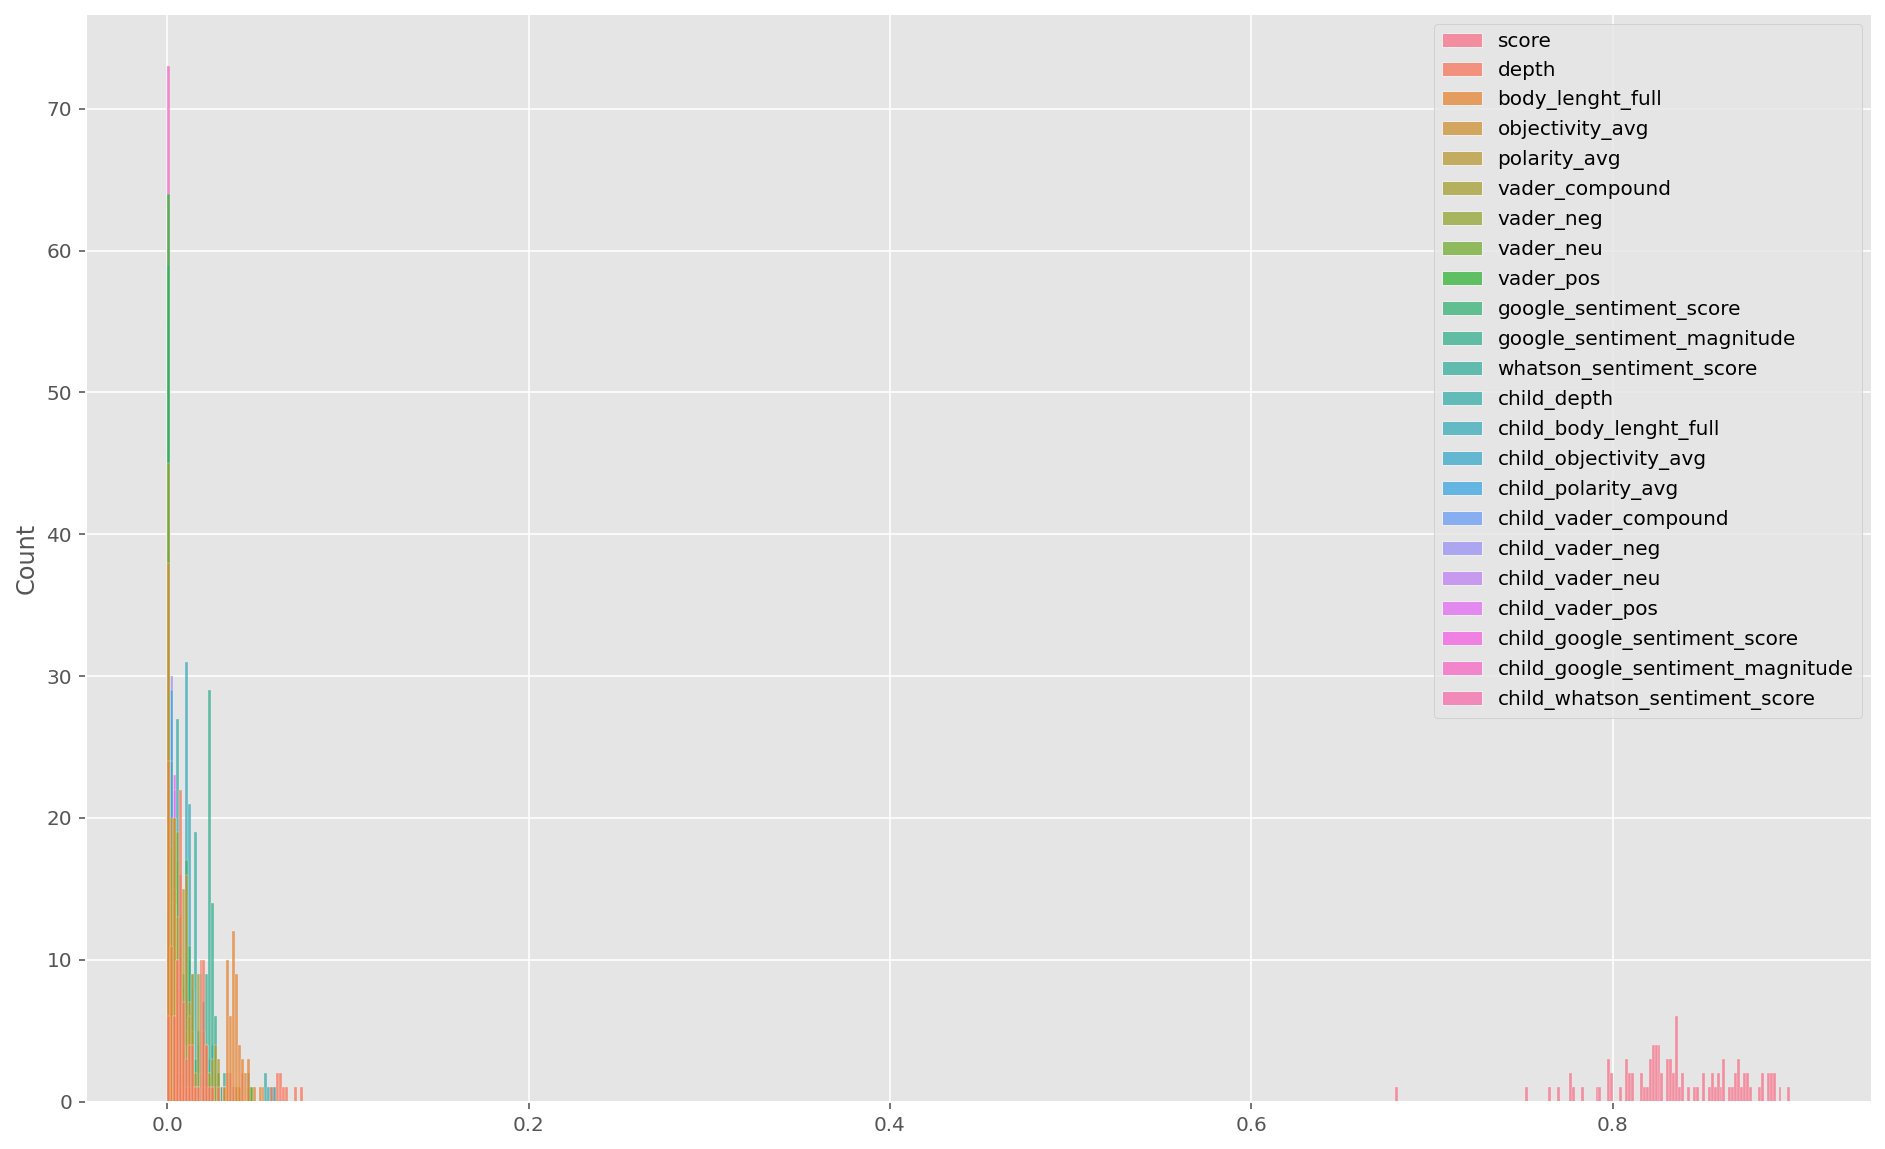

In [147]:

fig, ax = plt.subplots(figsize=(16, 10))
sns.histplot(data=pd_feat)
plt.plot

In [52]:
from sklearn.linear_model import ElasticNet

In [41]:
X_train

,score,depth,body_lenght_full,objectivity_avg,polarity_avg,vader_compound,vader_neg,vader_neu,vader_pos,google_sentiment_score,...,child_body_lenght_full,child_objectivity_avg,child_polarity_avg,child_vader_compound,child_vader_neg,child_vader_neu,child_vader_pos,child_google_sentiment_score,child_google_sentiment_magnitude,child_whatson_sentiment_score
1947,2.0,4.0,53,0.764270,-0.072977,0.8225,0.000,0.836,0.164,0.2,...,28.0,0.836806,-0.107639,-0.8427,0.266,0.734,0.000,-0.6,2.0,-0.998182
16571,49.0,0.0,37,0.922222,-0.068651,-0.4767,0.079,0.921,0.000,-0.4,...,142.0,0.793654,-0.061735,-0.9752,0.203,0.739,0.058,-0.4,3.4,-0.823786
5062,-26.0,1.0,34,0.764583,0.091204,0.5023,0.073,0.797,0.130,-0.1,...,214.0,0.870106,0.069411,0.8738,0.018,0.908,0.075,0.1,2.8,0.495335
11619,8.0,1.0,52,0.869329,-0.009239,0.8591,0.000,0.838,0.162,0.2,...,31.0,0.962109,-0.017578,-0.8020,0.199,0.801,0.000,-0.6,1.2,-0.952370
17102,3.0,3.0,64,0.852648,0.083346,0.8979,0.000,0.834,0.166,-0.1,...,138.0,0.880920,0.079415,0.9555,0.011,0.870,0.120,0.1,2.9,0.439494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3635,38.0,1.0,29,0.960379,0.006138,0.0000,0.000,1.000,0.000,-0.2,...,49.0,0.842848,-0.013402,-0.0258,0.118,0.784,0.098,0.1,0.1,0.334543
6757,16.0,4.0,283,0.782178,0.033925,-0.9752,0.128,0.808,0.064,-0.3,...,188.0,0.838812,0.036618,-0.9640,0.131,0.817,0.052,-0.3,7.3,-0.576108
9137,1.0,2.0,98,0.855533,-0.041765,-0.9178,0.130,0.870,0.000,-0.4,...,60.0,0.859623,0.041721,0.7096,0.000,0.908,0.092,-0.1,0.4,0.302942
19436,-1.0,6.0,136,0.874179,-0.058990,-0.9700,0.194,0.758,0.048,-0.4,...,19.0,0.870000,0.073333,-0.4939,0.151,0.849,0.000,-0.7,0.7,-0.641438


In [83]:
params = dict_b
gs_dt_l = GridSearchCV(pipe_dt, params, cv=5, n_jobs=-2, verbose=1)
gs_dt_l.fit(X_train, y_train)
print(gs_dt_l.best_score_)
print(gs_dt_l.score(X_train, y_train))
gs_dt_l.best_estimator_[1].feature_importances_

Fitting 5 folds for each of 1 candidates, totalling 5 fits
0.16999520418889918
0.27448827493848227


array([0.8803734 , 0.00935406, 0.02828045, 0.00169591, 0.        ,
       0.00496585, 0.01165216, 0.        , 0.00289797, 0.0168314 ,
       0.00857682, 0.00177809, 0.        , 0.00395364, 0.00238856,
       0.        , 0.00134428, 0.00234951, 0.00475381, 0.00328648,
       0.00631918, 0.00763044, 0.00156799])

In [135]:
coef_df.to_csv('RandomForestRegressor-max-features-features.csv')

In [ ]:
coef_df.mean_test_score.hist()

In [125]:
len(X_train.columns)

23

In [126]:
len(gs.best_estimator_[1].feature_importances_)

23

In [131]:
df_feat = pd.DataFrame(columns=X_train.columns)
df_feat.append(np.array(gs.best_estimator_[1].feature_importances_))
df_feat

TypeError: cannot concatenate object of type '<class 'numpy.ndarray'>'; only Series and DataFrame objs are valid

In [53]:
model = ElasticNet()
pipe = Pipeline(steps=[('scaler', scaler),
                       ('model', model)])

In [56]:
pipe.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('model', ElasticNet())],
 'verbose': False,
 'scaler': StandardScaler(),
 'model': ElasticNet(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'model__alpha': 1.0,
 'model__copy_X': True,
 'model__fit_intercept': True,
 'model__l1_ratio': 0.5,
 'model__max_iter': 1000,
 'model__normalize': False,
 'model__positive': False,
 'model__precompute': False,
 'model__random_state': None,
 'model__selection': 'cyclic',
 'model__tol': 0.0001,
 'model__warm_start': False}

In [58]:
params = {'model__l1_ratio': [0.1,0.3,0.5,0.6,0.9,1],
          }
gs_en = GridSearchCV(pipe, params, cv=5, n_jobs=-2, verbose=1)
gs_en.fit(X_train, y_train)
print(gs_en.best_score_)
print(gs_en.score(X_train, y_train))
print(gs_en.score(X_test, y_test))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
0.14874680724225858
0.15417455107252798
0.1421761569823362


In [59]:
gs_en.best_estimator_[1]

ElasticNet(l1_ratio=1)

In [61]:
test2 = gs_en.best_estimator_[1]

In [62]:
test2.coef_

array([ 4.49845188, -0.10794271, -0.        , -0.        , -0.        ,
       -0.        ,  0.        , -0.        ,  0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.        ,
       -0.        , -0.        ,  0.        ,  0.        , -0.        ,
       -0.        , -0.        , -0.        ])

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

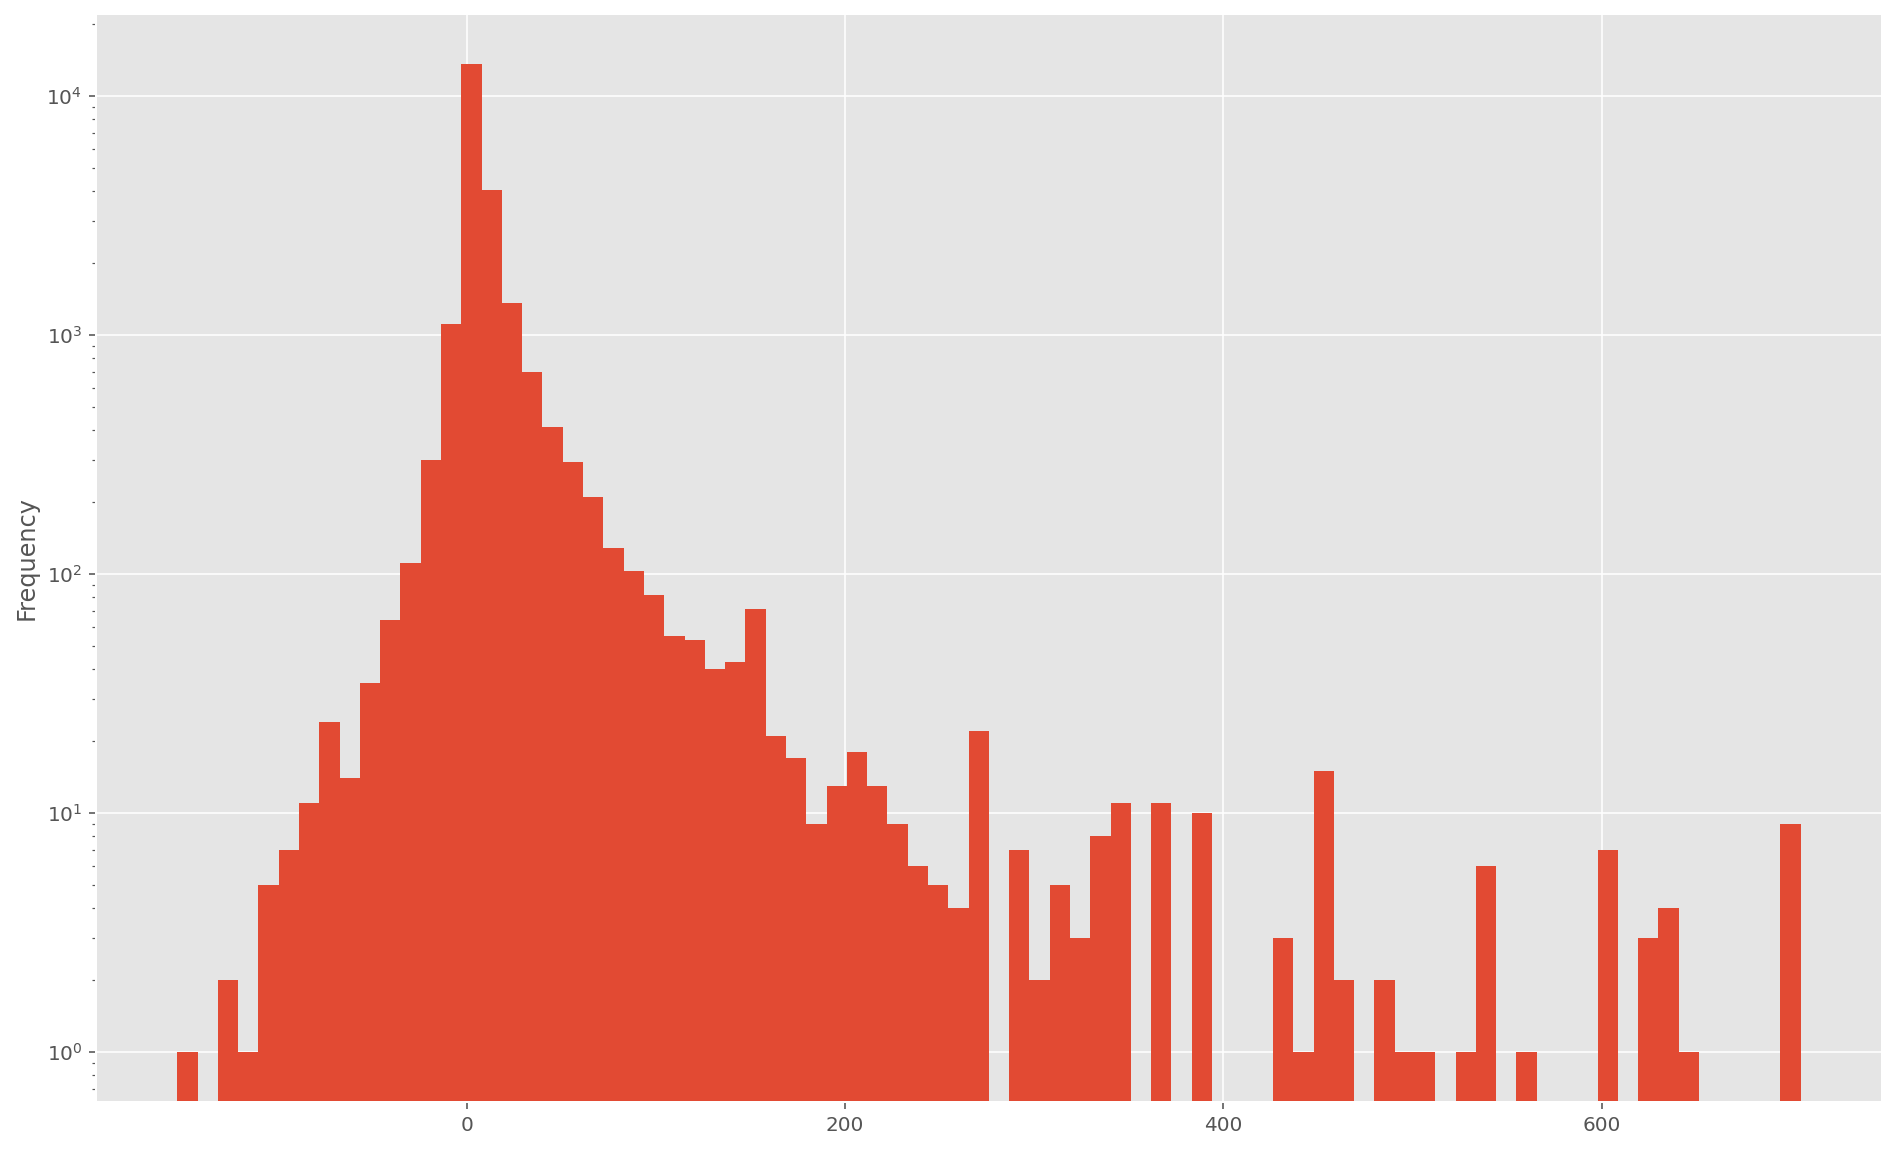

In [68]:
fig, ax = plt.subplots(figsize=(16, 10))
df.score.plot.hist(bins=80)
plt.yscale('log')
plt.plot

In [70]:
pick = GridSearchCV(pipe, params, cv=5, n_jobs=-2, verbose=1)

In [74]:
import pickle

pickle.load(open('RandomForestRegressor-max-features-gs.pickel', 'rb'))

EOFError: Ran out of input

In [ ]:
pickle.load(open('RandomForestRegressor-max-features-gs.pickel', 'rb'))